In [1]:
import pandas as pd
import numpy as np

In [24]:
data = "Resources/wildfires.csv"
df = pd.read_csv(data, low_memory=False)

In [25]:
df.head()

,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DURATION,DATE,MONTH,DAY_OF_WEEK
0,1,FED,FOUNTAIN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,...,5.0,USFS,CA,63,63.0,Plumas,0.0,2005-02-02,2,2
1,2,FED,PIGEON,NaN,2004,2453137.5,133,845.0,1.0,Lightning,...,5.0,USFS,CA,61,61.0,Placer,0.0,2004-05-12,5,2
2,3,FED,SLACK,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,...,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,0.0,2004-05-31,5,0
3,4,FED,DEER,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,5.0,USFS,CA,3,3.0,Alpine,5.0,2004-06-28,6,0
4,5,FED,STEVENOT,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,5.0,USFS,CA,3,3.0,Alpine,5.0,2004-06-28,6,0


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [26]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    intentional = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in intentional:
        cause = 3
    else:
        cause = 4
    return cause

df['CAUSE'] = df['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x))
df.head()

,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DURATION,DATE,MONTH,DAY_OF_WEEK,CAUSE
0,1,FED,FOUNTAIN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,...,USFS,CA,63,63.0,Plumas,0.0,2005-02-02,2,2,4
1,2,FED,PIGEON,NaN,2004,2453137.5,133,845.0,1.0,Lightning,...,USFS,CA,61,61.0,Placer,0.0,2004-05-12,5,2,1
2,3,FED,SLACK,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,...,STATE OR PRIVATE,CA,17,17.0,El Dorado,0.0,2004-05-31,5,0,2
3,4,FED,DEER,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,USFS,CA,3,3.0,Alpine,5.0,2004-06-28,6,0,1
4,5,FED,STEVENOT,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,USFS,CA,3,3.0,Alpine,5.0,2004-06-28,6,0,1


In [27]:
def reg4(stcd):
    region4 = 0
    West = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
    Midwest = ['IL','IN','IA','KS','MI','MN','MO','NE', 'ND','OH', 'SD', 'WI']
    South = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
    Northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
    if stcd in West:
        region4 = 1
    elif stcd in Midwest:
        region4 = 2
    elif stcd in South:
        region4 = 3
    elif stcd in Northeast:
        region4 = 4
    else:
        region4 = 0
    return region4

df['REGION4'] = df['STATE'].apply(lambda x: reg4(x))


def reg9(stcd):
    region9 = 0
    PFC = ['AK', 'CA', 'HI', 'OR', 'WA']
    MNT = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY']
    WNC = ['IA','KS', 'MN','MO','NE', 'ND', 'SD']
    ENC = ['IL','IN','MI', 'OH', 'WI']
    WSC = ['AR', 'LA', 'OK', 'TX']
    ESC = ['AL', 'KY', 'MS', 'TN']
    SA = ['DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV']
    MA = ['NJ', 'NY', 'PA']
    NE = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT']
    if stcd in PFC:
        region9 = 1
    elif stcd in MNT:
        region9 = 2
    elif stcd in WNC:
        region9 = 3
    elif stcd in ENC:
        region9 = 4
    elif stcd in WSC:
        region9 = 5
    elif stcd in ESC:
        region9 = 6
    elif stcd in SA:
        region9 = 7
    elif stcd in MA:
        region9 = 8
    elif stcd in NE:
        region9 = 9    
    else:
        region9 = 0
    return region9

df['REGION9'] = df['STATE'].apply(lambda x: reg9(x))


df.head()

,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,COUNTY,FIPS_CODE,FIPS_NAME,DURATION,DATE,MONTH,DAY_OF_WEEK,CAUSE,REGION4,REGION9
0,1,FED,FOUNTAIN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,...,63,63.0,Plumas,0.0,2005-02-02,2,2,4,1,1
1,2,FED,PIGEON,NaN,2004,2453137.5,133,845.0,1.0,Lightning,...,61,61.0,Placer,0.0,2004-05-12,5,2,1,1,1
2,3,FED,SLACK,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,...,17,17.0,El Dorado,0.0,2004-05-31,5,0,2,1,1
3,4,FED,DEER,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,3,3.0,Alpine,5.0,2004-06-28,6,0,1,1,1
4,5,FED,STEVENOT,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,3,3.0,Alpine,5.0,2004-06-28,6,0,1,1,1


In [28]:
def own(odc):
    owner = 0
    MissOth = ['MISSING/NOT SPECIFIED', 'OTHER FEDERAL', 'BOR', 'FOREIGN', 'MUNICIPAL/LOCAL', 'COUNTY', 'UNDEFINED FEDERAL']
    BiaTrb = ['BIA','TRIBAL']
    Park = ['USFS', 'FWS', 'BLM', 'NPS']
    Priv = ['PRIVATE']
    State = ['STATE OR PRIVATE', 'STATE']
    if odc in MissOth:
        owner = 1
    elif odc in BiaTrb:
        owner = 2
    elif odc in Park:
        owner = 3
    elif odc in Priv:
        owner = 4
    elif odc in State:
        owner = 5
    else:
        owner = 0
    return owner

df['OWNER'] = df['OWNER_DESCR'].apply(lambda x: own(x))

df.head()

,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,FIPS_CODE,FIPS_NAME,DURATION,DATE,MONTH,DAY_OF_WEEK,CAUSE,REGION4,REGION9,OWNER
0,1,FED,FOUNTAIN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,...,63.0,Plumas,0.0,2005-02-02,2,2,4,1,1,3
1,2,FED,PIGEON,NaN,2004,2453137.5,133,845.0,1.0,Lightning,...,61.0,Placer,0.0,2004-05-12,5,2,1,1,1,3
2,3,FED,SLACK,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,...,17.0,El Dorado,0.0,2004-05-31,5,0,2,1,1,5
3,4,FED,DEER,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,3.0,Alpine,5.0,2004-06-28,6,0,1,1,1,3
4,5,FED,STEVENOT,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,...,3.0,Alpine,5.0,2004-06-28,6,0,1,1,1,3


In [29]:
df['STATE'] = le.fit_transform(df['STATE'])
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])

In [30]:
df.head()

,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,FIPS_CODE,FIPS_NAME,DURATION,DATE,MONTH,DAY_OF_WEEK,CAUSE,REGION4,REGION9,OWNER
0,1,FED,FOUNTAIN,NaN,2005,2453403.5,33,1300.0,9.0,7,...,63.0,Plumas,0.0,2005-02-02,2,2,4,1,1,3
1,2,FED,PIGEON,NaN,2004,2453137.5,133,845.0,1.0,6,...,61.0,Placer,0.0,2004-05-12,5,2,1,1,1,3
2,3,FED,SLACK,NaN,2004,2453156.5,152,1921.0,5.0,3,...,17.0,El Dorado,0.0,2004-05-31,5,0,2,1,1,5
3,4,FED,DEER,NaN,2004,2453184.5,180,1600.0,1.0,6,...,3.0,Alpine,5.0,2004-06-28,6,0,1,1,1,3
4,5,FED,STEVENOT,NaN,2004,2453184.5,180,1600.0,1.0,6,...,3.0,Alpine,5.0,2004-06-28,6,0,1,1,1,3


In [31]:
#reduced dataframe keeping only columns needed for machine learning with all causes
rdf1 = df[["STAT_CAUSE_DESCR", "FIRE_YEAR", "LATITUDE", "LONGITUDE", "STATE", "FIRE_SIZE", "DURATION", "MONTH", "DAY_OF_WEEK"]]
rdf1.head()

,STAT_CAUSE_DESCR,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK
0,7,2005,40.036944,-121.005833,4,0.10,0.0,2,2
1,6,2004,38.933056,-120.404444,4,0.25,0.0,5,2
2,3,2004,38.984167,-120.735556,4,0.10,0.0,5,0
3,6,2004,38.559167,-119.913333,4,0.10,5.0,6,0
4,6,2004,38.559167,-119.933056,4,0.10,5.0,6,0


In [32]:
#reduced dataframe keeping only columns needed for machine learning with grouped causes
rdf2 = df[["CAUSE", "FIRE_YEAR", "LATITUDE", "LONGITUDE", "STATE", "FIRE_SIZE", "DURATION", "MONTH", "DAY_OF_WEEK"]]
rdf2.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0


In [33]:
#reduced dataframe keeping only columns needed for machine learning with grouped causes, 4 regions, owner variable
rdf3 = df[["CAUSE", "FIRE_YEAR", "LATITUDE", "LONGITUDE", "FIRE_SIZE", "DURATION", "MONTH", "DAY_OF_WEEK", "REGION4", "OWNER"]]
rdf3.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,REGION4,OWNER
0,4,2005,40.036944,-121.005833,0.10,0.0,2,2,1,3
1,1,2004,38.933056,-120.404444,0.25,0.0,5,2,1,3
2,2,2004,38.984167,-120.735556,0.10,0.0,5,0,1,5
3,1,2004,38.559167,-119.913333,0.10,5.0,6,0,1,3
4,1,2004,38.559167,-119.933056,0.10,5.0,6,0,1,3


In [34]:
#reduced dataframe keeping only columns needed for machine learning with grouped causes, 9 regions, owner variable
rdf4 = df[["CAUSE", "FIRE_YEAR", "LATITUDE", "LONGITUDE", "FIRE_SIZE", "DURATION", "MONTH", "DAY_OF_WEEK", "REGION9", "OWNER"]]
rdf4.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,REGION9,OWNER
0,4,2005,40.036944,-121.005833,0.10,0.0,2,2,1,3
1,1,2004,38.933056,-120.404444,0.25,0.0,5,2,1,3
2,2,2004,38.984167,-120.735556,0.10,0.0,5,0,1,5
3,1,2004,38.559167,-119.913333,0.10,5.0,6,0,1,3
4,1,2004,38.559167,-119.933056,0.10,5.0,6,0,1,3


In [52]:
#reduced dataframe keeping only columns needed for machine learning with grouped causes, state, owner
rdf5 = df[["CAUSE", "FIRE_YEAR", "LATITUDE", "LONGITUDE", "STATE", "FIRE_SIZE", "DURATION", "MONTH", "DAY_OF_WEEK", "OWNER"]]
rdf5.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3


In [35]:
rdf1 = rdf1.dropna(subset=['DURATION'])
len(rdf1)

988934

In [36]:
rdf2 = rdf2.dropna(subset=['DURATION'])
len(rdf2)

988934

In [37]:
rdf3 = rdf3.dropna(subset=['DURATION'])
len(rdf3)

988934

In [38]:
rdf4 = rdf4.dropna(subset=['DURATION'])
len(rdf4)

988934

In [53]:
rdf5 = rdf5.dropna(subset=['DURATION'])
len(rdf5)

988934

In [42]:
#Filter out Region = 0 (PR)
rdf3 = rdf3[rdf3["REGION4"] > 0]
len(rdf3)

988698

In [44]:
#Filter out Region = 0 (PR)
rdf4 = rdf4[rdf4["REGION9"] > 0]
len(rdf4)

988698

In [45]:
rdf4["REGION9"].value_counts()

2    246206
7    204102
1    182885
6    101327
8     77355
3     76097
5     58117
4     27635
9     14974
Name: REGION9, dtype: int64

In [46]:
import matplotlib.pyplot as plt

In [47]:
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()

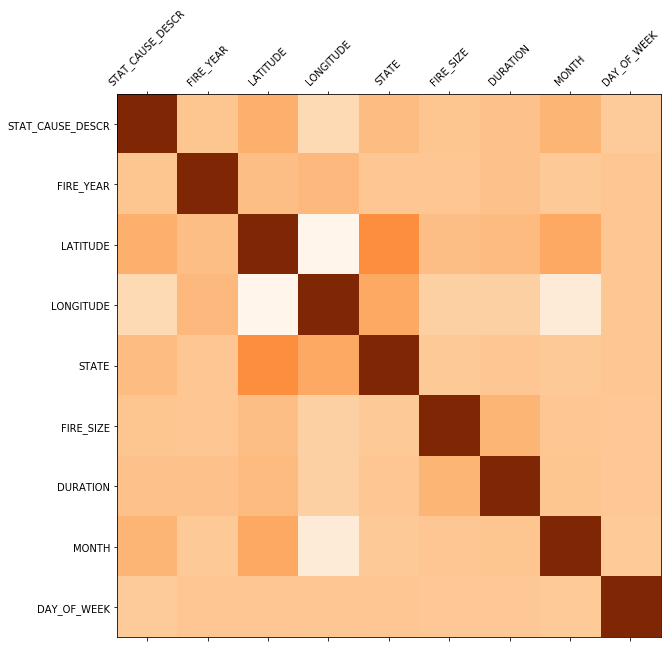

In [34]:
plot_corr(rdf1)

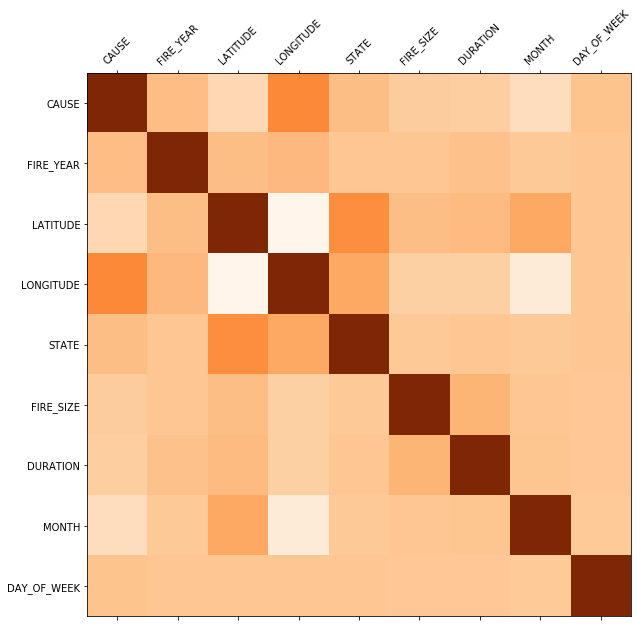

In [35]:
plot_corr(rdf2)

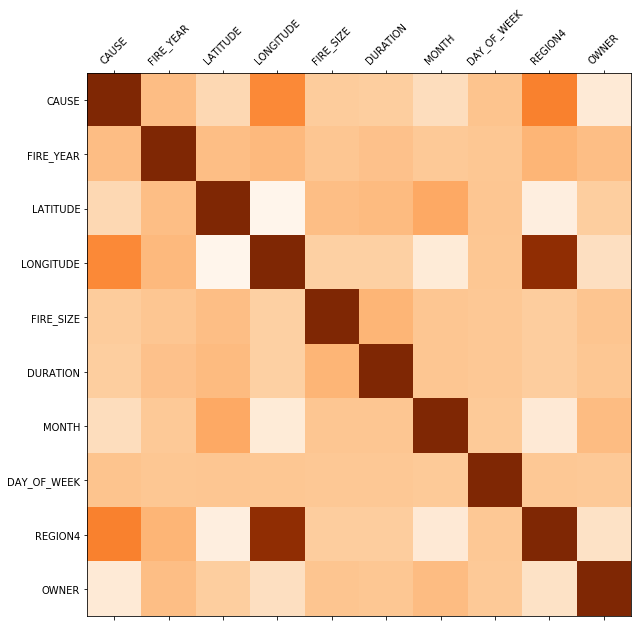

In [48]:
plot_corr(rdf3)

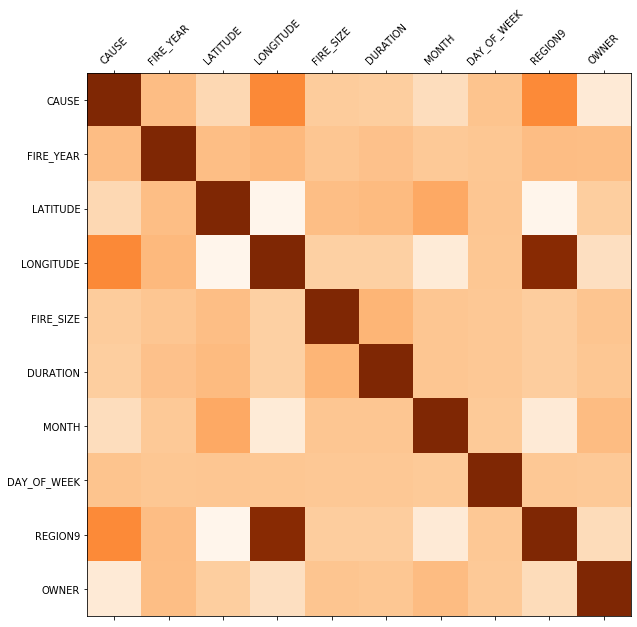

In [49]:
plot_corr(rdf4)

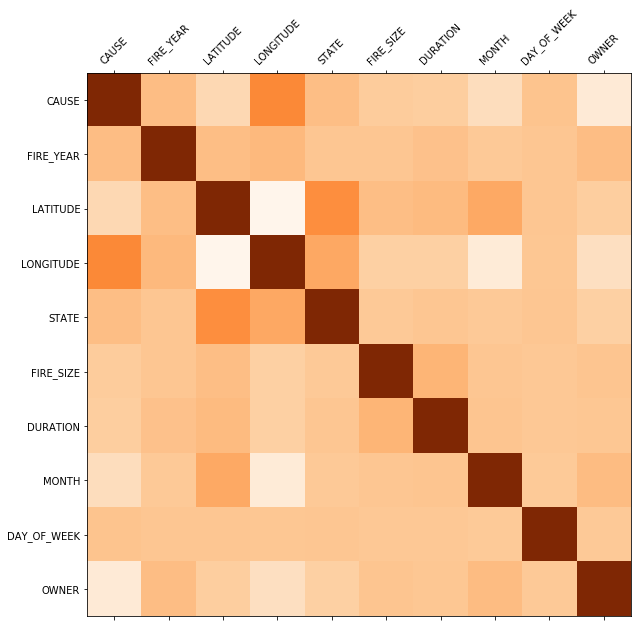

In [54]:
plot_corr(rdf5)

In [36]:
output_data_file1 = "Resources/wildfires_ml1.csv"
rdf1.to_csv(output_data_file1, index=False, header=True)

In [37]:
output_data_file2 = "Resources/wildfires_ml2.csv"
rdf2.to_csv(output_data_file2, index=False, header=True)

In [50]:
output_data_file3 = "Resources/wildfires_ml3.csv"
rdf3.to_csv(output_data_file3, index=False, header=True)

In [51]:
output_data_file4 = "Resources/wildfires_ml4.csv"
rdf4.to_csv(output_data_file4, index=False, header=True)

In [55]:
output_data_file5 = "Resources/wildfires_ml5.csv"
rdf5.to_csv(output_data_file5, index=False, header=True)